# Creating MNE-Python Data Structures from Scratch

How to create MNE-Python's core data structures using an existing Numpy array of (real or synthetic) data. 

In [1]:
import mne
import numpy as np

## Creating Info Objects

To initialize a minimal Info object requires a list of channel names, and a sampling frequency. As a convenience for simulated data, channel names can be provided as a single integer, and the names will be automatically created as sequential integers (starting with 0):

In [2]:
n_channels = 32
sampling_freq = 200
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 32 MISC
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 200.0 Hz
>


In [3]:
# Assigning cahannel types
ch_names = [f'MEG{n:03}' for n in range(1, 10)] + ['EOG001']
ch_types = ['mag', 'grad', 'grad'] * 3 + ['eog']

info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
print(info)


<Info | 7 non-empty values
 bads: []
 ch_names: MEG001, MEG002, MEG003, MEG004, MEG005, MEG006, MEG007, MEG008, ...
 chs: 3 MAG, 6 GRAD, 1 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 10
 projs: []
 sfreq: 200.0 Hz
>


In [4]:
# If the channel names follow one of the standard montage naming schemes,
# then we can leverage the standard
# NOTE: Does the board follow any standard?
ch_names = ['T7', 'CP5', 'FC5', 'C3', 'C4', 'FC6', 'CP6', 'T8']
ch_types = ['eeg'] * 8

info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage('standard_1020')           # <-- my guess is that this is what OpenBCI follows


<Info | 8 non-empty values
 bads: []
 ch_names: T7, CP5, FC5, C3, C4, FC6, CP6, T8
 chs: 8 EEG
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 200.0 Hz
>

In [5]:
# Additional fields can be added or modified similar to any Python dictionary.
info['description'] = 'My custom dataset'
info['bads'] = ['01']
print(info)

<Info | 10 non-empty values
 bads: 1 items (01)
 ch_names: T7, CP5, FC5, C3, C4, FC6, CP6, T8
 chs: 8 EEG
 custom_ref_applied: False
 description: My custom dataset
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 200.0 Hz
>


## Creating Raw objects

To create a Raw object from scratch, you can use the mne.io.RawArray class constructor, which takes an Info object and a NumPy array of shape (n_channels, n_samples).

Creating RawArray with float64 data, n_channels=8, n_times=700
    Range : 0 ... 699 =      0.000 ...     2.796 secs
Ready.


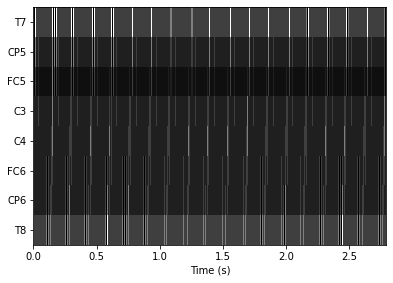

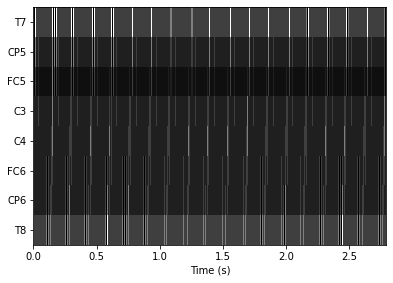

In [17]:
# Using a sample NumPy from our runs. 
sample_other_data = np.loadtxt('../TrimmedData/Other/1629943739.npy', delimiter=',')
info = mne.create_info(ch_names=['T7', 'CP5', 'FC5', 'C3', 'C4', 'FC6', 'CP6', 'T8'],
    ch_types=['eeg']*8,
    sfreq=250)

simulated_raw = mne.io.RawArray(np.transpose(sample_other_data), info)

# Note: Must transpose data first,
# mne.io.RawArray(data, info) function requires data in shape (n_channels, n_times)

simulated_raw.plot(show_scrollbars=False, show_scalebars=False)

## Creating Epochs objects
To create an Epochs object from scratch, you can use the mne.EpochsArray class constructor, which takes an Info object and a NumPy array of shape (n_epochs, n_channels, n_samples). Here we'll create 5 epochs of our 2-channel data, and plot it. Notice that we have  to pass picks='misc' to the plot method, b'cos the default only plots data channels.

Creating RawArray with float64 data, n_channels=2, n_times=200
    Range : 0 ... 199 =      0.000 ...     0.995 secs
Ready.


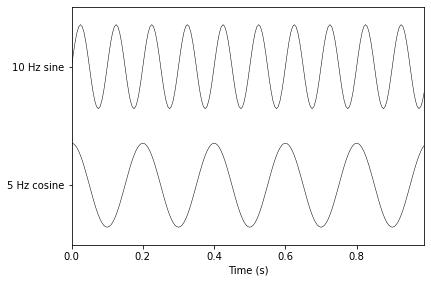

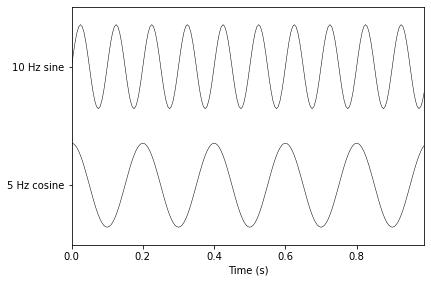

In [21]:
# Using treated data:
times = np.linspace(0, 1, sampling_freq, endpoint=False)
sine = np.sin(20 * np.pi * times)
cosine = np.cos(10 * np.pi * times)
data = np.array([sine, cosine])

info = mne.create_info(ch_names=['10 Hz sine', '5 Hz cosine'],
                       ch_types=['misc'] * 2,
                       sfreq=sampling_freq)

sample_raw = mne.io.RawArray(data, info)
sample_raw.plot(show_scrollbars=False, show_scalebars=False)

Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


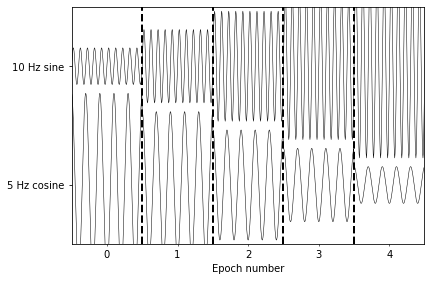

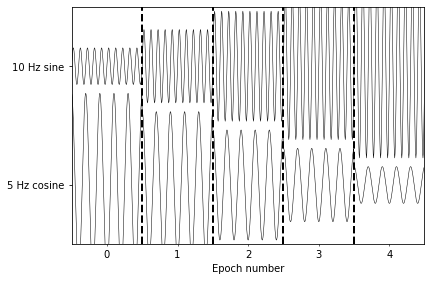

In [22]:
data = np.array([[0.2 * sine, 1.0 * cosine],
                 [0.4 * sine, 0.8 * cosine],
                 [0.6 * sine, 0.6 * cosine],
                 [0.8 * sine, 0.4 * cosine],
                 [1.0 * sine, 0.2 * cosine]])

simulated_epochs = mne.EpochsArray(data, info)
simulated_epochs.plot(picks='misc', show_scrollbars=False)

## Creating Evoked Objects

In [23]:
## couldn't make sense of this part... A little too complex for me. 